In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pprint import pprint

from sklearn.manifold import MDS
from adjustText import adjust_text

import os
import sys
from pathlib import Path

# フォルダパスを指定してsys.pathに追加
sys.path.append(str(Path(os.getcwd()).resolve().parent.parent / "func"))

# 関数が格納されているモジュールをインポート
import amalysis

In [2]:
raw = str(Path(os.getcwd()).resolve().parent.parent) + '/data/Amy_dissimilarity.csv'
df_raw = pd.read_csv(raw, header=None).T
df_raw.index = ['word1'] + ['word2'] + list(range(1, df_raw.shape[0]-1))
df_raw = df_raw.rename(columns={0:'BDI'})
df_raw.loc['word2', 'BDI'] = np.nan
head = df_raw.iloc[:2, :].copy()
df_raw

,BDI,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
word1,BDI,brown,orange,red,black,green,red,envy,fear,pink,...,blue,blue,fear,purple,disgust,calm,orange,green,brown,anxiety
word2,NaN,anger,anxiety,yellow,blue,calm,pink,joy,anger,green,...,envy,anxiety,happiness,confidence,defeated,happiness,pink,disgust,joy,boredom
1,24,7,7,3,3,2,1,4,1,3,...,4,1,7,4,3,1,2,3,4,5
2,11,7,7,6,7,5,6,7,2,6,...,3,4,7,5,5,2,7,7,7,3
3,13,7,6,5,6,2,3,7,5,6,...,7,3,6,7,5,0,7,2,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,5,4,5,3,1,1,6,6,2,6,...,5,5,7,7,6,1,5,2,4,4
117,18,6,2,0,0,3,0,2,3,1,...,6,3,7,3,1,1,3,1,6,3
118,5,6,6,2,2,5,1,6,0,2,...,6,6,6,6,6,6,1,6,6,6
119,14,7,3,7,5,3,2,7,2,3,...,7,6,7,4,3,2,3,3,7,7


In [3]:
# Extract the data range and sort by BDI score
df = df_raw.iloc[2:, :].copy()
df = df.sort_values('BDI', ignore_index=True)
df

,BDI,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,0,3,4,2,2,4,2,6,6,2,...,6,6,7,1,0,1,1,6,6,0
1,0,7,5,5,6,2,2,7,6,7,...,6,5,7,3,3,2,4,5,5,4
2,0,6,6,0,0,2,0,2,1,1,...,7,6,6,7,3,1,0,7,7,5
3,0,7,6,5,3,1,2,7,2,6,...,5,5,7,3,4,1,2,7,6,4
4,0,5,5,0,0,5,0,1,0,0,...,5,5,2,5,2,1,0,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,34,7,7,7,3,3,3,7,3,3,...,7,0,7,7,2,0,7,0,7,7
116,36,7,7,6,5,4,2,7,2,5,...,3,6,7,3,2,0,2,1,7,7
117,38,7,7,4,3,3,2,7,3,5,...,5,7,7,2,6,0,1,7,7,4
118,39,7,5,4,4,3,1,7,3,4,...,7,6,5,3,3,2,3,1,7,3


In [4]:
# Make high1/2, low1/2 groups which only have dissimilarity scores
df_low1 = pd.concat([head, df[df.index.isin(np.arange(0, 60, 2))]]).drop('BDI', axis=1).copy()
df_low2 = pd.concat([head, df[df.index.isin(np.arange(1, 60, 2))]]).drop('BDI', axis=1).copy()
df_high1  = pd.concat([head, df[df.index.isin(np.arange(60, 120, 2))]]).drop('BDI', axis=1).copy()
df_high2  = pd.concat([head, df[df.index.isin(np.arange(61, 120, 2))]]).drop('BDI', axis=1).copy()

df_60 = [df_low1, df_low2, df_high1, df_high2]

In [5]:
# make dissimilarity matrixes
unique_words = np.array(['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'grey', 'black', 'happiness', 'joy', 'calm', 'confidence', 'envy', 'fear', 'anxiety', 'disgust', 'sadness', 'confusion', 'boredom', 'defeated'])
dissim_60_mean = []
dissim_60_std = []

for idx, arr in enumerate(df_60):
    dissim_m_temp, dissim_s_temp = amalysis.create_dissimilarity_matrix(arr, unique_words)
    dissim_60_mean.append(dissim_m_temp)
    dissim_60_std.append(dissim_s_temp)

len(dissim_60_mean)

4

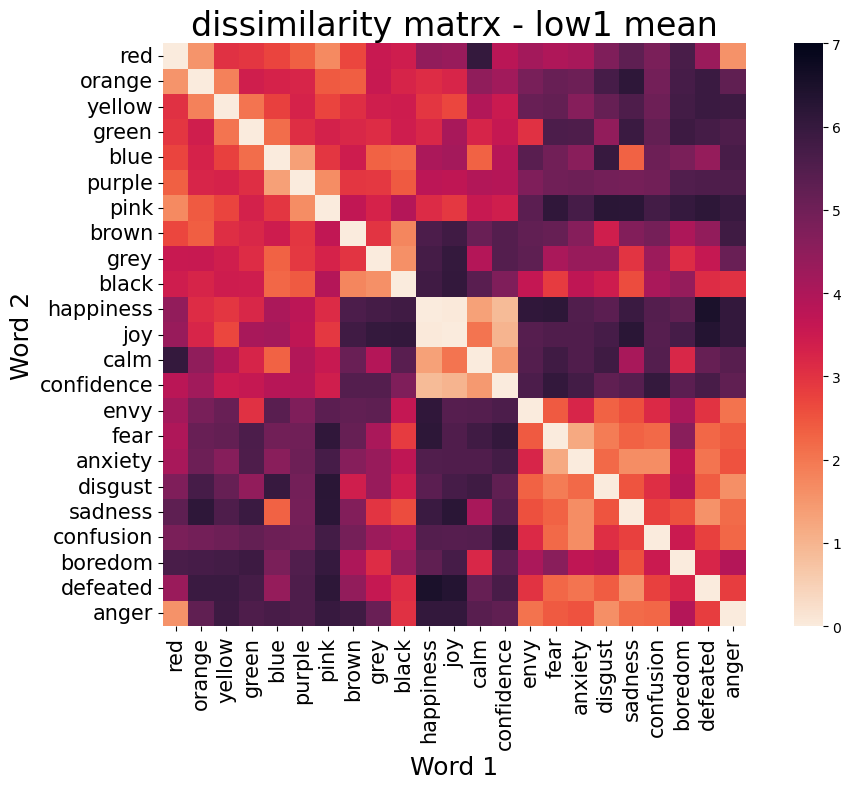

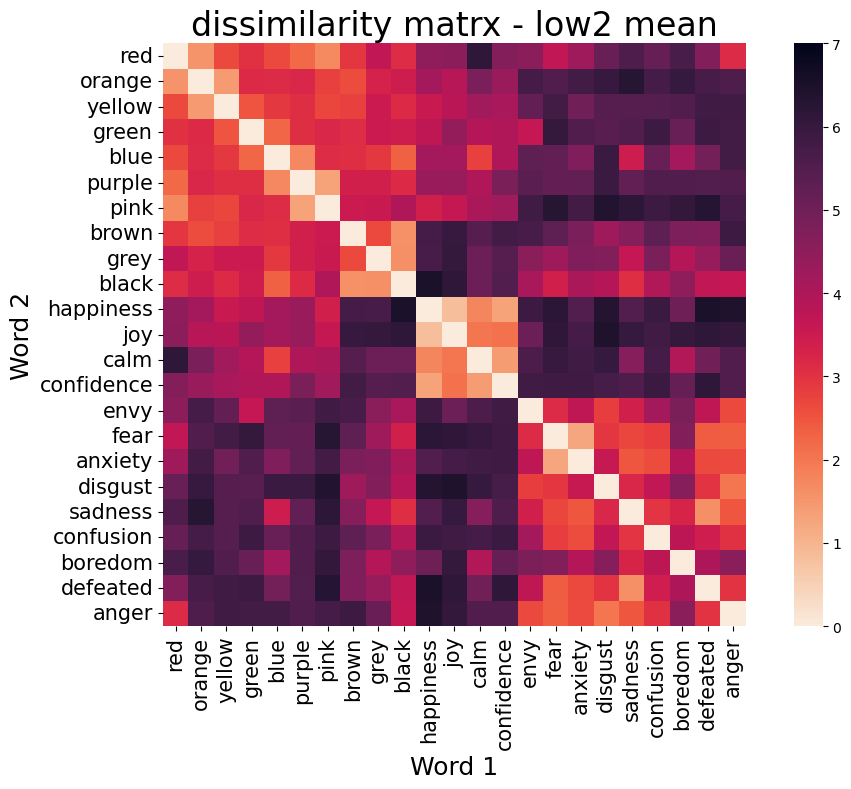

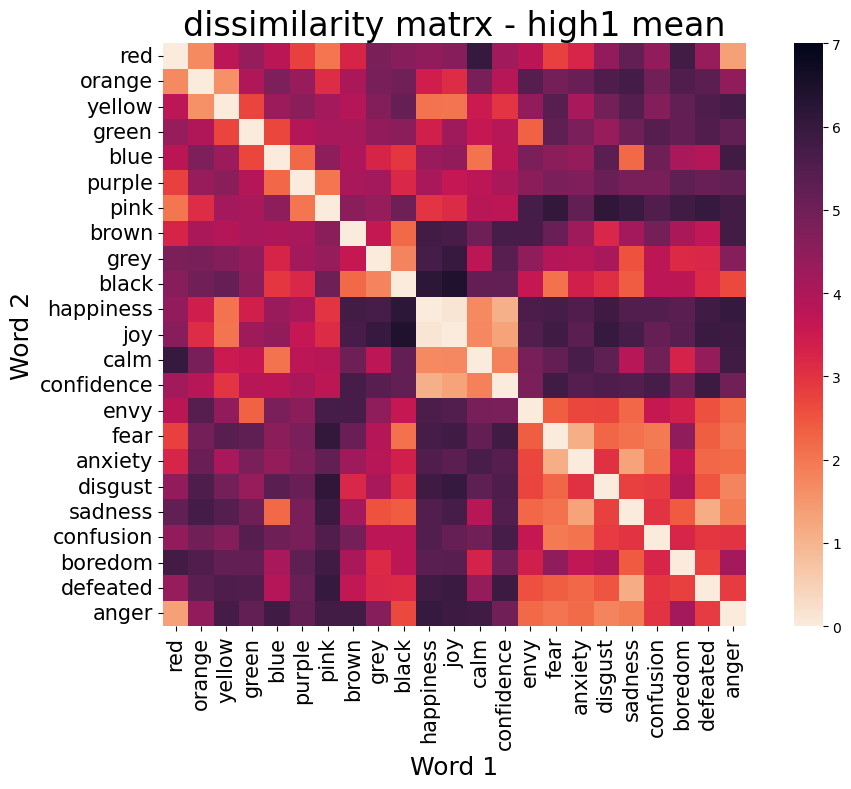

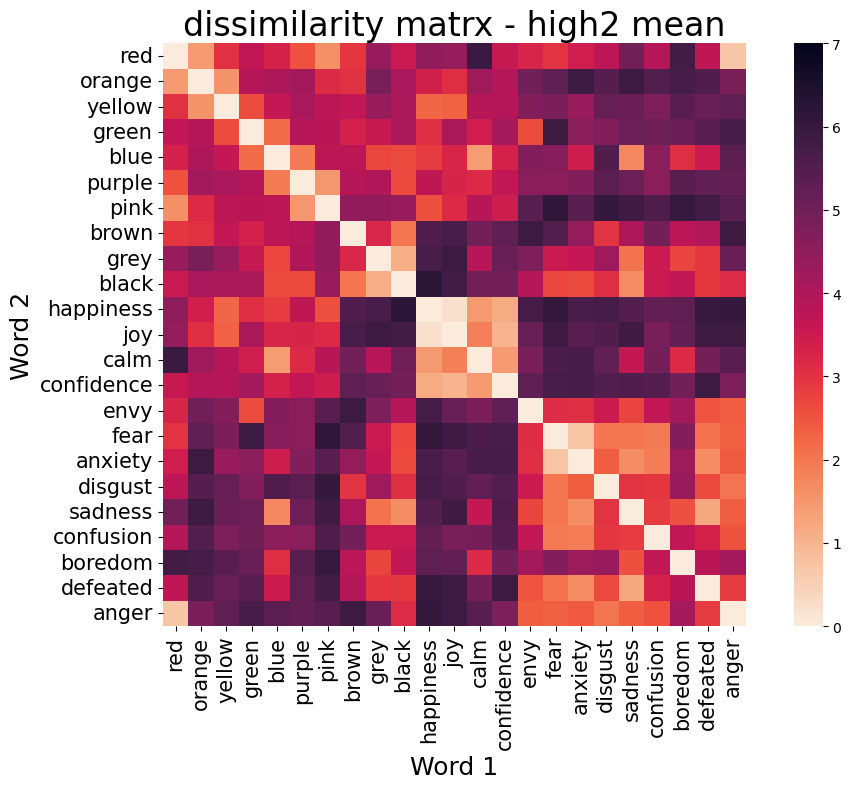

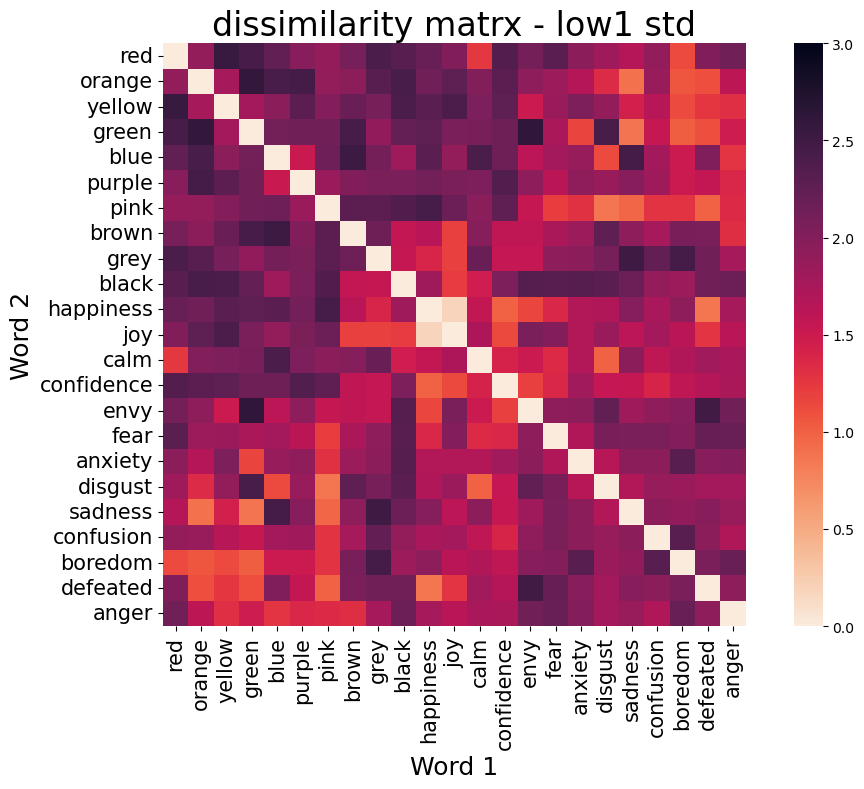

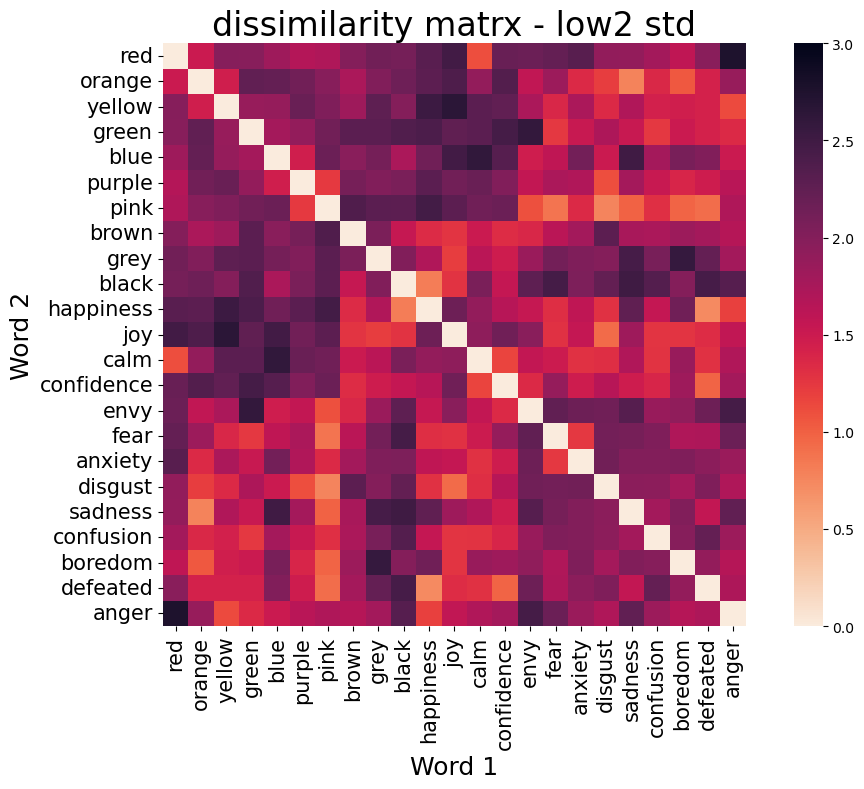

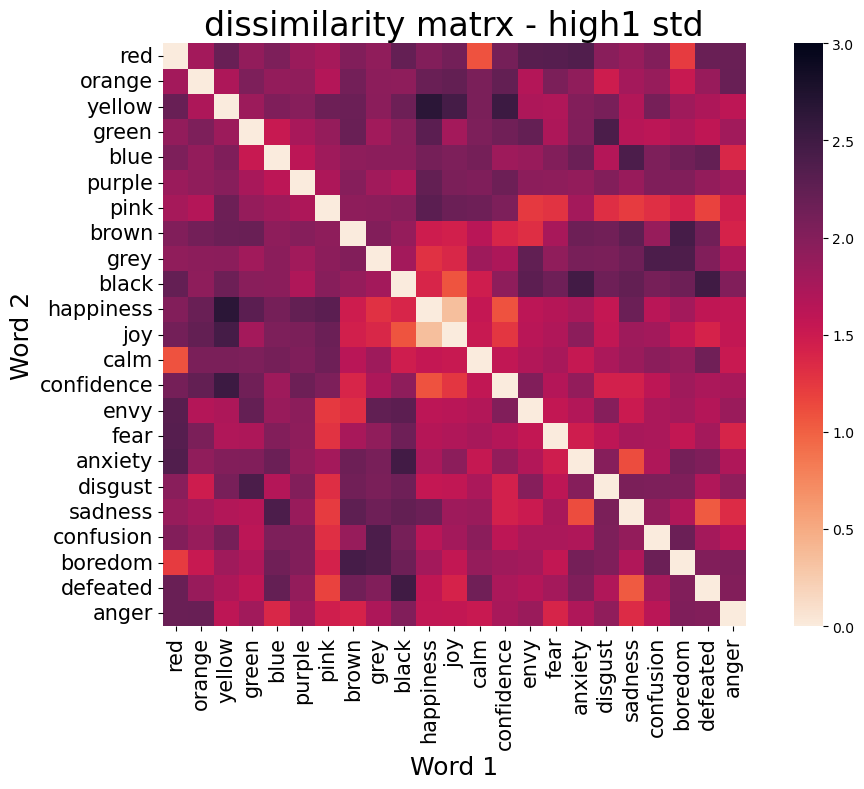

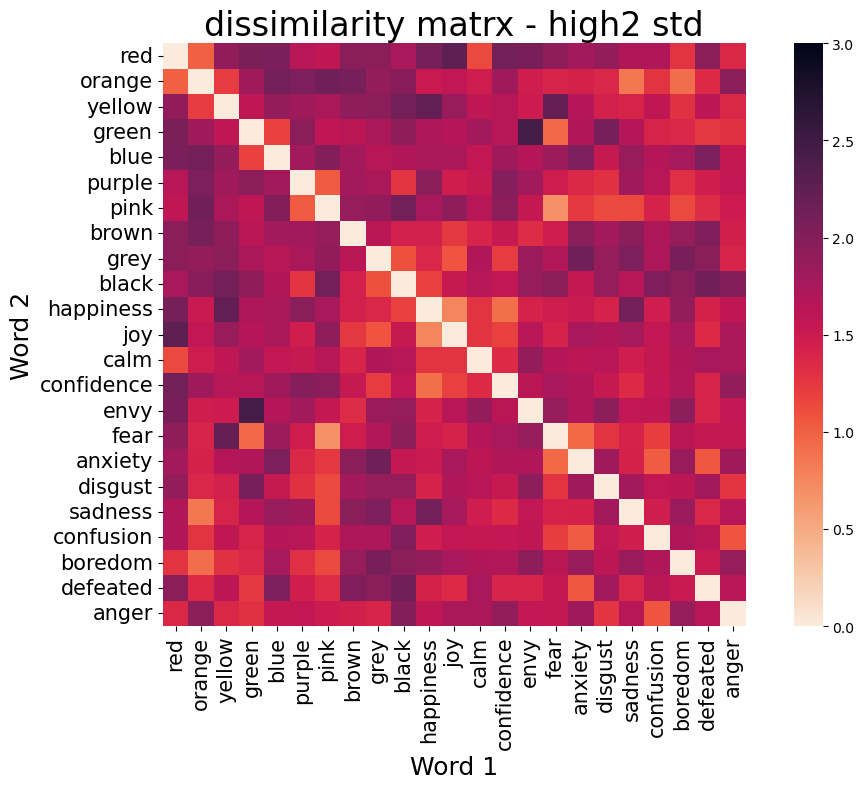

In [6]:
index = ['low1', 'low2', 'high1', 'high2']
for idx, group in enumerate(index):
    amalysis.plot_dissimilarity_heatmap(dissim_60_mean[idx], title=f"dissimilarity matrx - {group} mean")
for idx, group in enumerate(index):
    amalysis.plot_dissimilarity_heatmap(dissim_60_std[idx], mode_mean=False, title=f"dissimilarity matrx - {group} std")

In [7]:
# Correlation of dissimilarity matrix - all words
# vectors = amalysis.get_tri_vector(dissim_60_mean)
# amalysis.calc_corr_dissim(vectors, index)

In [8]:
# Correlation of dissimilarity matrix - colours
# dissim_60_color = []
#for i in range(len(dissim_60_mean)):
#   dissim_60_color.append(dissim_60_mean[i].iloc[:10, :10])

#vec_color = amalysis.get_tri_vector(dissim_60_color)
#amalysis.calc_corr_dissim(vec_color, index)

In [9]:
# Correlation of dissimilarity matrix - emotions
#dissim_60_emo = []
#for i in range(len(dissim_60_mean)):
#    dissim_60_emo.append(dissim_60_mean[i].iloc[10:, 10:])
#
#vec_emo = amalysis.get_tri_vector(dissim_60_emo)
#amalysis.calc_corr_dissim(vec_emo, index)

In [10]:
# Correlation of dissimilarity matrix - colour vs emotions

#vec_ec = []
#for i in range(len(dissim_60_mean)):
#    vec_temp = dissim_60_mean[i].iloc[10:, :10].to_numpy()
#    vec_temp = vec_temp.flatten()
#    vec_ec.append(vec_temp)
    
#amalysis.calc_corr_dissim(vec_ec, index)

In [11]:
# MDS

mds_res = np.zeros((len(index), 23, 2))
for idx in range(len(index)):
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=0)
    mds_res[idx, :, :] = mds.fit_transform(dissim_60_mean[idx])

/home/jovyan/work/func/amalysis.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels,fontsize=15)
/home/jovyan/work/func/amalysis.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels,fontsize=15)


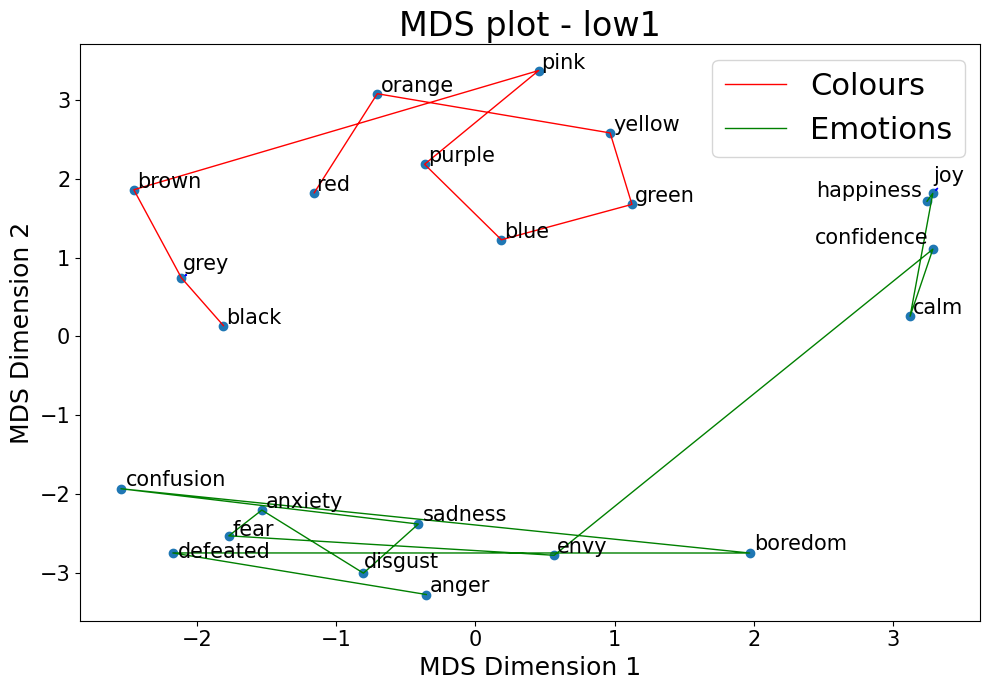

/home/jovyan/work/func/amalysis.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels,fontsize=15)
/home/jovyan/work/func/amalysis.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels,fontsize=15)


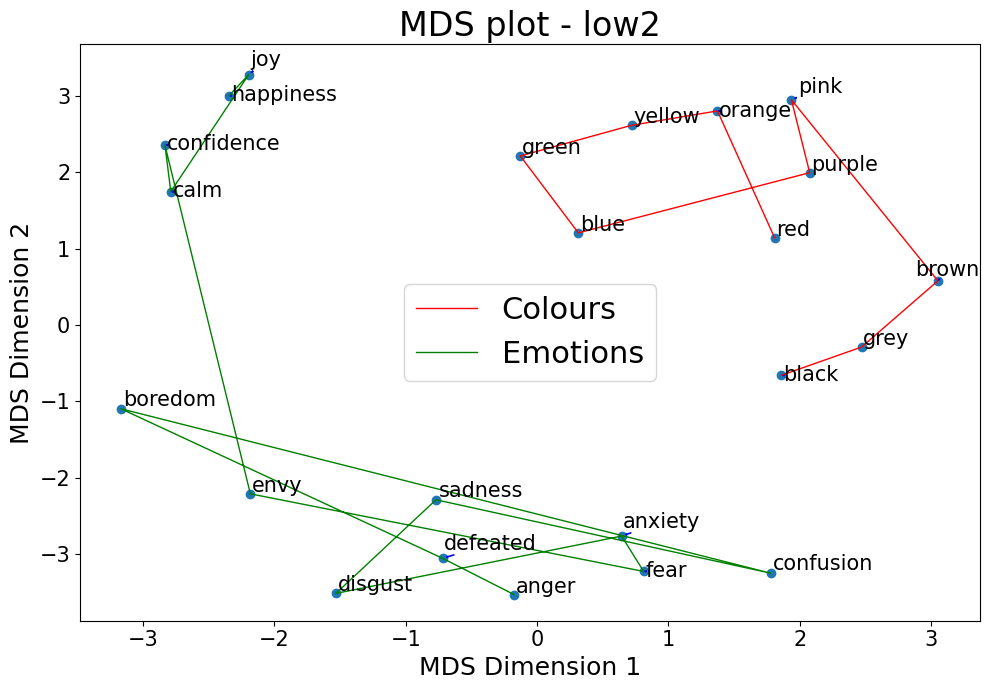

/home/jovyan/work/func/amalysis.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels,fontsize=15)
/home/jovyan/work/func/amalysis.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels,fontsize=15)


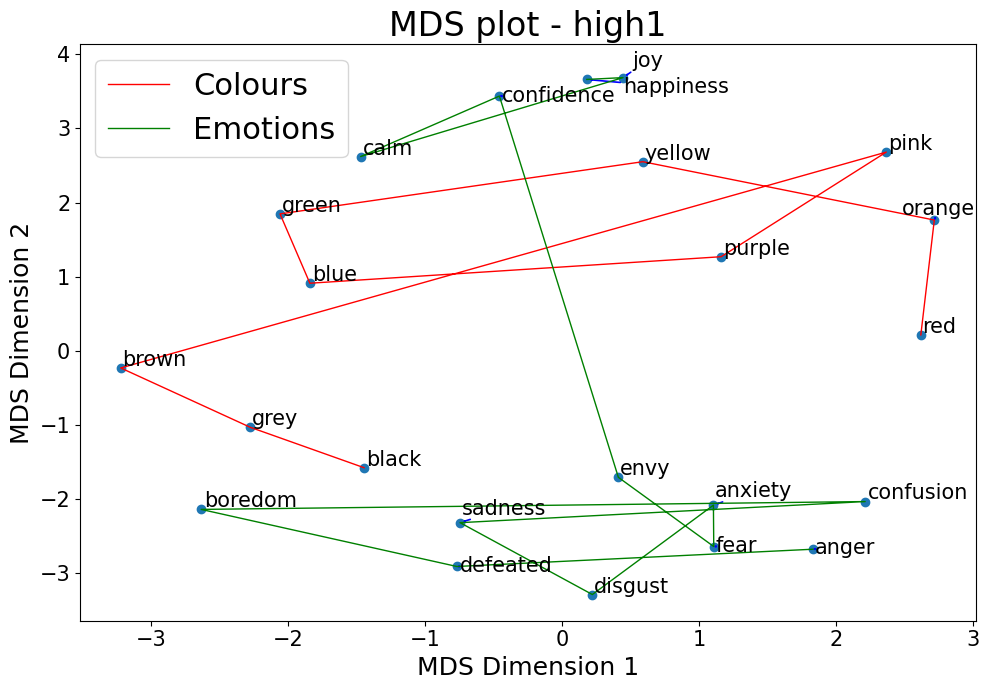

/home/jovyan/work/func/amalysis.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels,fontsize=15)
/home/jovyan/work/func/amalysis.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticklabels,fontsize=15)


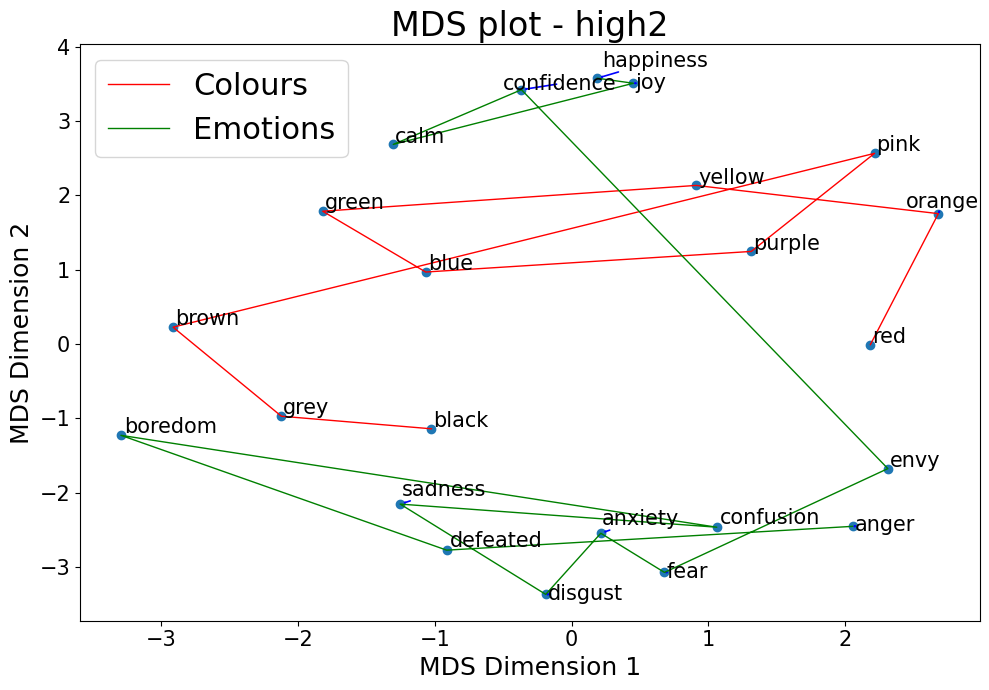

In [12]:
for i, group in enumerate(index):
    amalysis.plot_MDS(mds_res[i], dissim_60_mean[idx], title=f"MDS plot - {group}")

In [13]:
#GWOTライブラリの読みこみ
# GWTune/srcディレクトリの絶対パスを追加
sys.path.append(str(Path(os.getcwd()).parent.resolve()))
sys.path.append(str(Path(os.getcwd()).parent.resolve()/ "src"))
sys.path.append(str(Path(os.getcwd()).parent.resolve()/ "src" / "utils"))

# 必要なモジュールをインポート
from src.align_representations import Representation, AlignRepresentations, OptimizationConfig, VisualizationConfig

# numpy配列として読み込み
type(dissim_60_mean[0].to_numpy())  # dissimilarity matrixが格納されたファイルから読み込み

/opt/conda/envs/gwtune/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


numpy.ndarray

In [14]:
# Representationのリストを作成
representations = []
sim_mat = dissim_60_mean
index = ['low1', 'low2', 'high1', 'high2']
for i, dissim_data in enumerate(sim_mat):

    # 各類似度行列に対してRepresentationインスタンスを作成
    representation = Representation(
        name=str(index[i]),  # 各グループの名前（例: Group1, Group2, ...）
        metric="euclidean",  # 距離尺度
        sim_mat=dissim_data.to_numpy(),     # 類似度行列
        embedding=None,      # 埋め込みデータがない場合はNone
        get_embedding=True,  # TrueにするとMDSで埋め込みが計算される
        MDS_dim=3            # 埋め込みの次元（例：3次元）
    )
    representations.append(representation)

## GWOT configs

In [15]:
# setting of CPU and so on

eps_list_tutorial = [0.001, 5]
device = "cpu"
to_types = "numpy"

sinkhorn_method = "sinkhorn"
data_type = "double"
multi_gpu = False

# whether epsilon is sampled at log scale or not
eps_log = True

# set the number of trials, i.e., the number of epsilon values evaluated in optimization. default : 4
num_trial = 100

### Set the parameters for optimization
# initialization of transportation plan
# "uniform": uniform matrix, "diag": diagonal matrix, "random": random matrix
# Select multiple options was deprecated.
init_mat_plan = "random"

user_define_init_mat_list = None

In [16]:
# Optimizerの設定
config = OptimizationConfig(
    eps_list=eps_list_tutorial,
    eps_log=eps_log,
    num_trial=num_trial,
    sinkhorn_method=sinkhorn_method, 
    to_types = to_types,  # user can choose "numpy" or "torch". please set "torch" if one wants to use GPU.
    device = device,  # "cuda" or "cpu"; for numpy, only "cpu" can be used. 
    data_type = data_type,  # user can define the dtypes both for numpy and torch, "float(=float32)" or "double(=float64)". For using GPU with "sinkhorn", double is storongly recommended.
    n_jobs = 3,  # n_jobs : the number of worker to compute. if n_jobs = 1, normal computation will start. "Multithread" is used for Parallel computation.
    multi_gpu = multi_gpu,  # In the situation like n_jobs = 2 and multi_gpu = [0, 1, 2, 3], the first two group will be computed by GPU:0 and GPU:1, and the second two group will be computed by GPU:2 and GPU:3.
    db_params={"drivername": "sqlite"},
    init_mat_plan = init_mat_plan,

    user_define_init_mat_list = user_define_init_mat_list,

    n_iter = 1,
    max_iter = 200,

    sampler_name = "tpe",

    pruner_name = "hyperband",
    pruner_params = {"n_startup_trials": 1, 
                     "n_warmup_steps": 2, 
                     "min_resource": 2, 
                     "reduction_factor" : 3
                    },
)

## Choose pairs of representations for GWOT optimization

In [17]:
pairs_computed = None
specific_eps_list = None

In [18]:
data_select = 'Amy_0.001_5_200_2000'

# アライメントの実行
align_representation = AlignRepresentations(
    config=config,
    representations_list=representations,   
   
    # pairs_computed : user can limit the pairs here
    pairs_computed = pairs_computed,
   
    # specific_eps_list : user can define a specific range of epsilon for some pairs.
    specific_eps_list = specific_eps_list,
   
    # histogram matching : this will adjust the histogram of target to that of source.
    histogram_matching=False,

    # metric : The metric for computing the distance between the embeddings. Please set the metric tha can be used in "scipy.spatical.distance.cdist()".
    metric="euclidean", 

    # main_results_dir : folder or file name when saving the result
    main_results_dir = "../results/" + data_select,
   
    # data_name : Please rewrite this name if users want to use their own data.
    data_name = data_select,
)

data_name : Amy_0.001_5_200_2000
pairwise_method : combination
All the pairs in the list below will be computed. 
pair: low1_vs_low2 eps_list: [0.001, 5]
pair: low1_vs_high1 eps_list: [0.001, 5]
pair: low1_vs_high2 eps_list: [0.001, 5]
pair: low2_vs_high1 eps_list: [0.001, 5]
pair: low2_vs_high2 eps_list: [0.001, 5]
pair: high1_vs_high2 eps_list: [0.001, 5]


## Visualization config

In [19]:
visualization_config = VisualizationConfig(
    ### If you want to save the figure only, and don"t show them, please set show_figure = False.
    show_figure = True,
    
    ### Please set the parameters of the figure's appearance. The figure is drawn based on "matplotlib.pyplot"
    fig_ext="png",
    figsize=(8, 6),
    font="DejaVu Sans",
    cbar_label_size=15,
    cbar_ticks_size=15,
    cbar_format=None,
    cbar_label=None,
    xticks_size=20,
    yticks_size=20,
    xticks_rotation=90,
    yticks_rotation=0,
    tick_format="%.2f",
    title_size=20,
    legend_size=5,
    xlabel=None,
    xlabel_size=15,
    ylabel=None,
    ylabel_size=15,
    zlabel=None,
    zlabel_size=15,
    color_labels=None,
    color_hue=None,
    markers_list=None,
    marker_size=30,
    color = "C0",
    cmap = "rocket_r",
    
    ticks="Objects", ## you can use "objects" or "category" or "None". Default is None.
    
    ### Set ticks of the object label or the coarce category labels.
    # If both are False, no tick will be shown in the figure.
    ot_object_tick=True,
    ot_category_tick=False,
    
    ### Set the parameters for showing the boundary of the coarce category labels in the OT figure if the dataset have them. 
    # If not, please set draw_category_line = False.
    # Note that please set ot_category_tick = True when drawing the category line.
    draw_category_line=False,
    category_line_color="C2",
    category_line_alpha=0.2,
    category_line_style="dashed",
    
    
    ### From here below, user can define the parameters using for evaluation figure after alignment computation is done.
    # It is not necessary to set them here becuase we prepared "set_params" to add or re-define the parameters for making the figures. 
    # So, all the parameters below will be introduced after the alignment block.
    plot_eps_log=eps_log,
    lim_eps=None,
    lim_gwd=None,
    lim_acc=None,  
)

## Show dissimilarity matrices

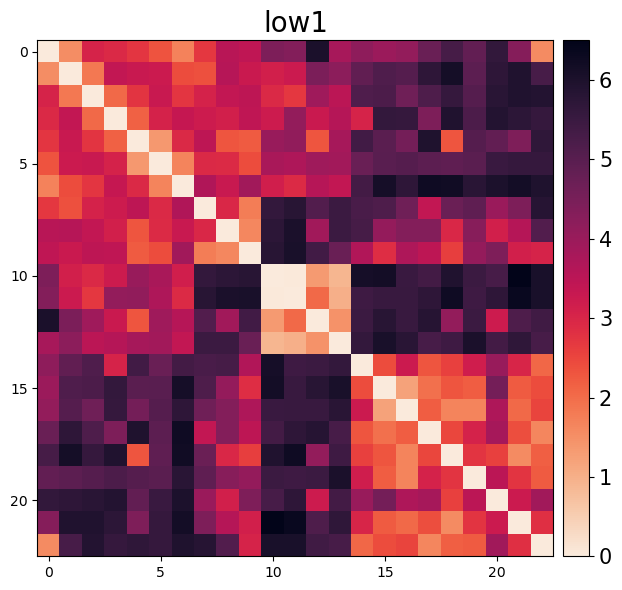

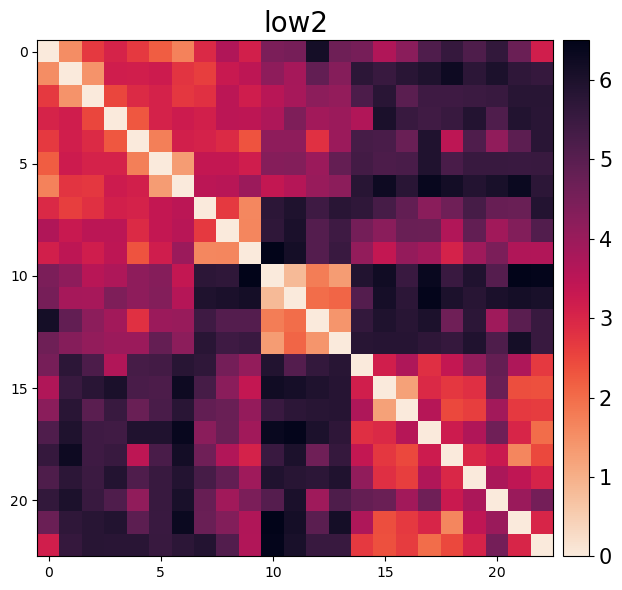

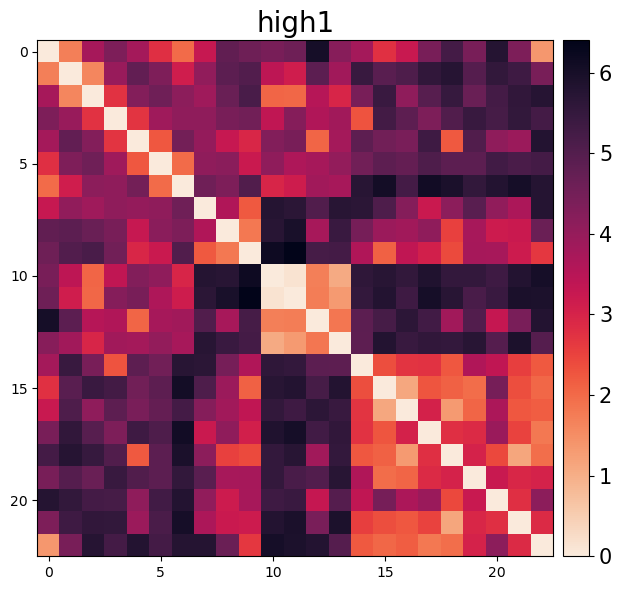

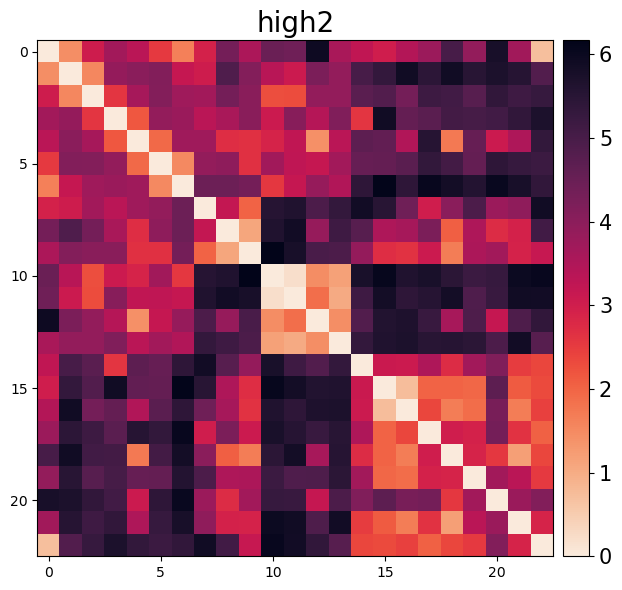

In [20]:

visualize_hist = VisualizationConfig(figsize=(8, 6), color="C0")
    
sim_mat = align_representation.show_sim_mat(
        sim_mat_format = "default", 
        visualization_config = visualization_config,
        visualization_config_hist = visualize_hist,
        show_distribution=False
)# if True, the histogram figure of the sim_mat will be shown. visualization_config_hist will be used for adjusting this figure.

In [21]:
### parameters for computing RSA
# metric = "pearson" or "spearman" by scipy.stats
# The result of RSA for each pair will be stored in align_representation.RSA_corr
align_representation.RSA_get_corr(metric = "pearson")

# print(align_representation.RSA_corr)

Correlation low1 vs low2 : 0.9639351596428511
Correlation low1 vs high1 : 0.9219151704656878
Correlation low1 vs high2 : 0.939328448133105
Correlation low2 vs high1 : 0.8772630662171637
Correlation low2 vs high2 : 0.9087825432289536
Correlation high1 vs high2 : 0.958206616017725


## GWOT

In [22]:
# If the computation has been completed and there is no need to recompute, set "compute_OT" to False. In this case, the previously calculated OT plans will be loaded.
compute_OT = False

### If the previous optimization data exists, you can delete it.
# Setting delete_results=True will delete both the database and the directory where the results of the previous optimization are stored.
# The code will prompt for confirmation before deleting all the results.
delete_results = False

In [23]:
visualization_config.set_params(
    xticks_rotation=0,
    cbar_label_size=15,
    cbar_ticks_size=15,
    xticks_size=20,
    yticks_size=20,
    xlabel_size=15,
    ylabel_size=15,
    
    cbar_format = "%.1e",
    )
    
sim_mat_format = "default"

align_representation.gw_alignment(
    compute_OT = compute_OT,
    delete_results = delete_results,
    return_data = True,
    return_figure = True,
    OT_format = sim_mat_format,
    visualization_config = visualization_config,
    sampler_seed = 42, 
    )

/home/jovyan/work/GWTune/src/align_representations.py:1586: SyntaxWarning: invalid escape sequence '\G'
  title = f"$\Gamma$ ({self.pair_name.replace('_', ' ')})"


ValueError: OT for low1_vs_low2 has not been computed yet.

# Step 4: Evaluation and Visualization

## Show how the GWD was optimized

In [ ]:
### Show how the GWD was optimized (evaluation figure)
# show both the relationships between epsilons and GWD, and between accuracy and GWD
visualization_config.set_params(cmap="winter")
align_representation.show_optimization_log(fig_dir=None, visualization_config=visualization_config) 

# GWOT - ver2
set epsilon [0.01, 1]

In [35]:
# Second version of GWOT
data_select = "Amy"
# setting of CPU and so on

eps_list_tutorial = [0.05, 1]
device = "cpu"
to_types = "numpy"

sinkhorn_method = "sinkhorn"
data_type = "double"
multi_gpu = False

# whether epsilon is sampled at log scale or not
eps_log = False

# set the number of trials, i.e., the number of epsilon values evaluated in optimization. default : 4
num_trial = 200

### Set the parameters for optimization
# initialization of transportation plan
# "uniform": uniform matrix, "diag": diagonal matrix, "random": random matrix
# Select multiple options was deprecated.
init_mat_plan = "random"

user_define_init_mat_list = None

In [36]:
# Optimizerの設定:同様
config = OptimizationConfig(
    eps_list=eps_list_tutorial,
    eps_log=eps_log,
    num_trial=num_trial,
    sinkhorn_method=sinkhorn_method, 
    to_types = to_types,  # user can choose "numpy" or "torch". please set "torch" if one wants to use GPU.
    device = device,  # "cuda" or "cpu"; for numpy, only "cpu" can be used. 
    data_type = data_type,  # user can define the dtypes both for numpy and torch, "float(=float32)" or "double(=float64)". For using GPU with "sinkhorn", double is storongly recommended.
    n_jobs = 3,  # n_jobs : the number of worker to compute. if n_jobs = 1, normal computation will start. "Multithread" is used for Parallel computation.
    multi_gpu = multi_gpu,  # In the situation like n_jobs = 2 and multi_gpu = [0, 1, 2, 3], the first two group will be computed by GPU:0 and GPU:1, and the second two group will be computed by GPU:2 and GPU:3.
    db_params={"drivername": "sqlite"},
    init_mat_plan = init_mat_plan,

    user_define_init_mat_list = user_define_init_mat_list,

    n_iter = 1,
    max_iter = 200,

    sampler_name = "tpe",

    pruner_name = "hyperband",
    pruner_params = {"n_startup_trials": 1, 
                     "n_warmup_steps": 2, 
                     "min_resource": 2, 
                     "reduction_factor" : 3
                    },
)

In [37]:
pairs_computed = None
specific_eps_list = None

In [38]:
# アライメントの実行
align_representation = AlignRepresentations(
    config=config,
    representations_list=representations,   
   
    # pairs_computed : user can limit the pairs here
    pairs_computed = pairs_computed,
   
    # specific_eps_list : user can define a specific range of epsilon for some pairs.
    specific_eps_list = specific_eps_list,
   
    # histogram matching : this will adjust the histogram of target to that of source.
    histogram_matching=False,

    # metric : The metric for computing the distance between the embeddings. Please set the metric tha can be used in "scipy.spatical.distance.cdist()".
    metric="euclidean", 

    # main_results_dir : folder or file name when saving the result
    main_results_dir = "../results/" + data_select,
   
    # data_name : Please rewrite this name if users want to use their own data.
    data_name = data_select,
)

data_name : Amy
pairwise_method : combination
All the pairs in the list below will be computed. 
pair: low1_vs_low2 eps_list: [0.05, 1]
pair: low1_vs_high1 eps_list: [0.05, 1]
pair: low1_vs_high2 eps_list: [0.05, 1]
pair: low2_vs_high1 eps_list: [0.05, 1]
pair: low2_vs_high2 eps_list: [0.05, 1]
pair: high1_vs_high2 eps_list: [0.05, 1]


In [39]:
# If the computation has been completed and there is no need to recompute, set "compute_OT" to False. In this case, the previously calculated OT plans will be loaded.
compute_OT = True

### If the previous optimization data exists, you can delete it.
# Setting delete_results=True will delete both the database and the directory where the results of the previous optimization are stored.
# The code will prompt for confirmation before deleting all the results.
delete_results = False

In [40]:
visualization_config = VisualizationConfig(
    ### If you want to save the figure only, and don"t show them, please set show_figure = False.
    show_figure = True,
    
    ### Please set the parameters of the figure's appearance. The figure is drawn based on "matplotlib.pyplot"
    fig_ext="png",
    figsize=(8, 6),
    font="DejaVu Sans",
    cbar_label_size=15,
    cbar_ticks_size=15,
    cbar_format=None,
    cbar_label=None,
    xticks_size=20,
    yticks_size=20,
    xticks_rotation=90,
    yticks_rotation=0,
    tick_format="%.2f",
    title_size=20,
    legend_size=5,
    xlabel=None,
    xlabel_size=15,
    ylabel=None,
    ylabel_size=15,
    zlabel=None,
    zlabel_size=15,
    color_labels=None,
    color_hue=None,
    markers_list=None,
    marker_size=30,
    color = "C0",
    cmap = "rocket_r",
    
    ticks="Objects", ## you can use "objects" or "category" or "None". Default is None.
    
    ### Set ticks of the object label or the coarce category labels.
    # If both are False, no tick will be shown in the figure.
    ot_object_tick=True,
    ot_category_tick=False,
    
    ### Set the parameters for showing the boundary of the coarce category labels in the OT figure if the dataset have them. 
    # If not, please set draw_category_line = False.
    # Note that please set ot_category_tick = True when drawing the category line.
    draw_category_line=False,
    category_line_color="C2",
    category_line_alpha=0.2,
    category_line_style="dashed",
    
    
    ### From here below, user can define the parameters using for evaluation figure after alignment computation is done.
    # It is not necessary to set them here becuase we prepared "set_params" to add or re-define the parameters for making the figures. 
    # So, all the parameters below will be introduced after the alignment block.
    plot_eps_log=eps_log,
    lim_eps=None,
    lim_gwd=None,
    lim_acc=None,  
)

fix init mat random seed: False
Study for Amy_low1_vs_low2_random was not found, creating a new one...


[I 2024-10-31 23:29:14,392] A new study created in RDB with name: Amy_low1_vs_low2_random


fix init mat random seed: False
fix init mat random seed: False
Study for Amy_low1_vs_high1_random was not found, creating a new one...
Study for Amy_low1_vs_high2_random was not found, creating a new one...


[I 2024-10-31 23:29:14,516] A new study created in RDB with name: Amy_low1_vs_high2_random
[I 2024-10-31 23:29:14,516] A new study created in RDB with name: Amy_low1_vs_high1_random
Amy_low1_vs_low2 No.0, eps:4.058e-01:   0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/gwtune/lib/python3.12/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
Amy_low1_vs_high1 No.0, eps:4.058e-01:   0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/gwtune/lib/python3.12/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
/opt/conda/envs/gwtune/lib/python3.12/site-packages/ot/bregman/_sinkhorn.py:531: UserWarn

fix init mat random seed: False
Study for Amy_low2_vs_high1_random was not found, creating a new one...


[I 2024-10-31 23:33:59,902] A new study created in RDB with name: Amy_low2_vs_high1_random
Amy_low1_vs_high1 No.128, eps:4.617e-01: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]
[I 2024-10-31 23:34:00,387] Trial 128 finished with value: 1.3981004939696726 and parameters: {'eps': 0.46166247746243605}. Best is trial 50 with value: 0.354933465806613.
Amy_low1_vs_high2 No.193, eps:2.080e-01: 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]
[I 2024-10-31 23:34:01,320] Trial 193 finished with value: 1.262536998332259 and parameters: {'eps': 0.20803470534947494}. Best is trial 74 with value: 0.24056338828038615.
Amy_low1_vs_high1 No.129, eps:4.332e-01: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
[I 2024-10-31 23:34:01,584] Trial 129 finished with value: 1.1976011365957464 and parameters: {'eps': 0.4332477931611913}. Best is trial 50 with value: 0.354933465806613.
Amy_low2_vs_high1 No.0, eps:4.058e-01: 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]
[I 2024-10-31 23:34:01,876] Trial 0 finished wi

fix init mat random seed: False
Study for Amy_low2_vs_high2_random was not found, creating a new one...


[I 2024-10-31 23:34:07,678] A new study created in RDB with name: Amy_low2_vs_high2_random
Amy_low2_vs_high1 No.3, eps:6.187e-01: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]
[I 2024-10-31 23:34:07,899] Trial 3 finished with value: 1.5997083771169964 and parameters: {'eps': 0.6187255599871848}. Best is trial 2 with value: 1.0088479041943996.
Amy_low2_vs_high1 No.4, eps:1.982e-01: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
[I 2024-10-31 23:34:09,049] Trial 4 finished with value: 1.3618171714691352 and parameters: {'eps': 0.19821770842031466}. Best is trial 2 with value: 1.0088479041943996.
Amy_low1_vs_high1 No.132, eps:5.049e-01: 100%|██████████| 1/1 [00:03<00:00,  3.70s/it]
[I 2024-10-31 23:34:09,560] Trial 132 finished with value: 1.4518124519790228 and parameters: {'eps': 0.5048643059529888}. Best is trial 50 with value: 0.354933465806613.
Amy_low1_vs_high1 No.133, eps:4.648e-01: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
[I 2024-10-31 23:34:10,482] Trial 133 finished with val

fix init mat random seed: False
Study for Amy_high1_vs_high2_random was not found, creating a new one...


[I 2024-10-31 23:36:05,600] Trial 73 finished with value: 1.2724793255396567 and parameters: {'eps': 0.31111030154549957}. Best is trial 58 with value: 0.44207510796889155.
[I 2024-10-31 23:36:05,623] A new study created in RDB with name: Amy_high1_vs_high2_random
Amy_low2_vs_high1 No.60, eps:4.449e-01: 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]
[I 2024-10-31 23:36:07,655] Trial 0 finished with value: 1.2892999627176458 and parameters: {'eps': 0.40581311290499433}. Best is trial 0 with value: 1.2892999627176458.
Amy_high1_vs_high2 No.1, eps:9.532e-01: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]
[I 2024-10-31 23:36:08,766] Trial 1 finished with value: 0.9037970243195488 and parameters: {'eps': 0.9531785910894204}. Best is trial 1 with value: 0.9037970243195488.
Amy_high1_vs_high2 No.2, eps:7.454e-01: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]
[I 2024-10-31 23:36:09,854] Trial 2 finished with value: 0.5630824265957937 and parameters: {'eps': 0.7453942447208348}. Best is trial 2 w

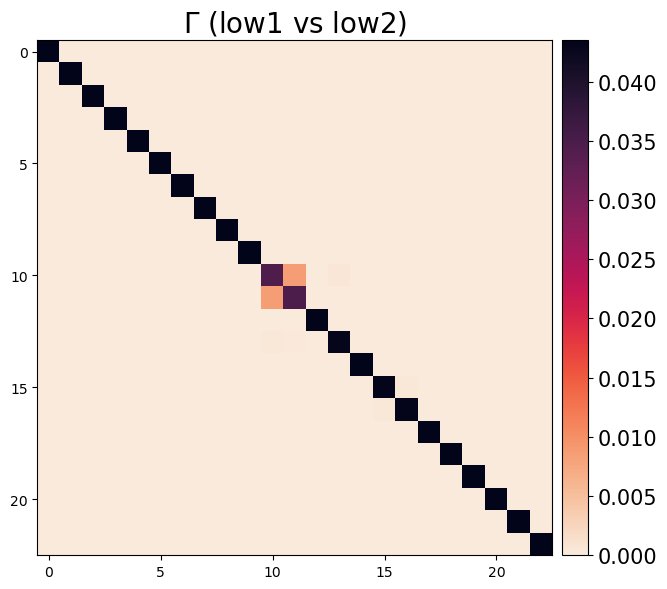

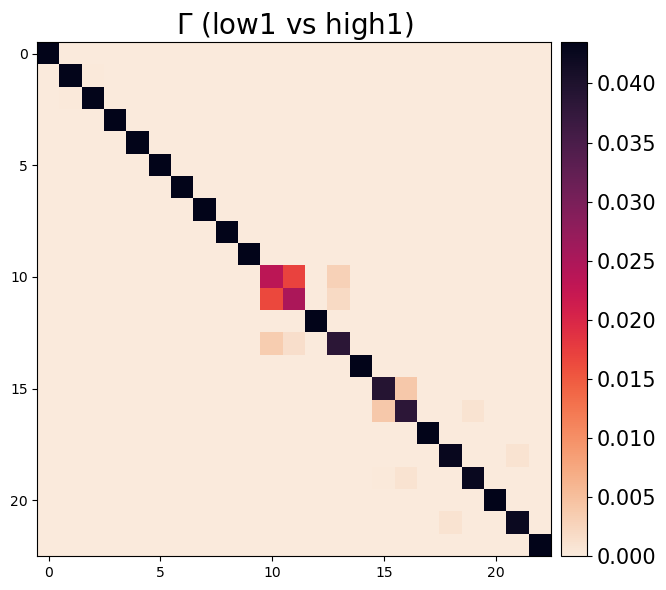

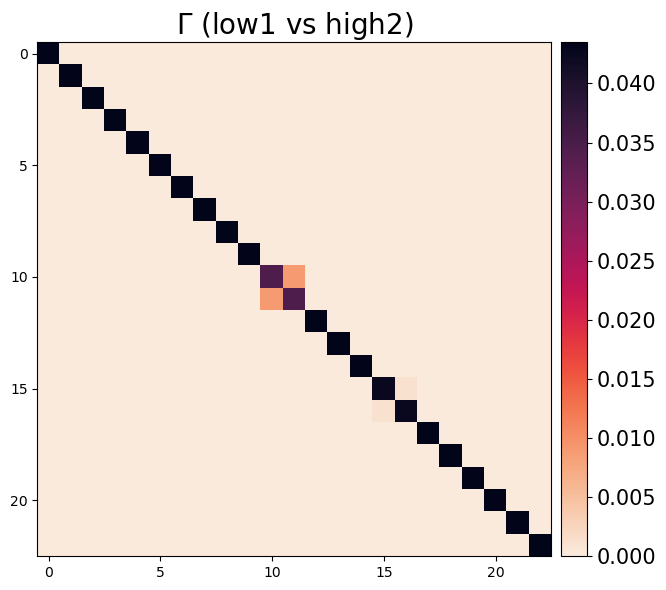

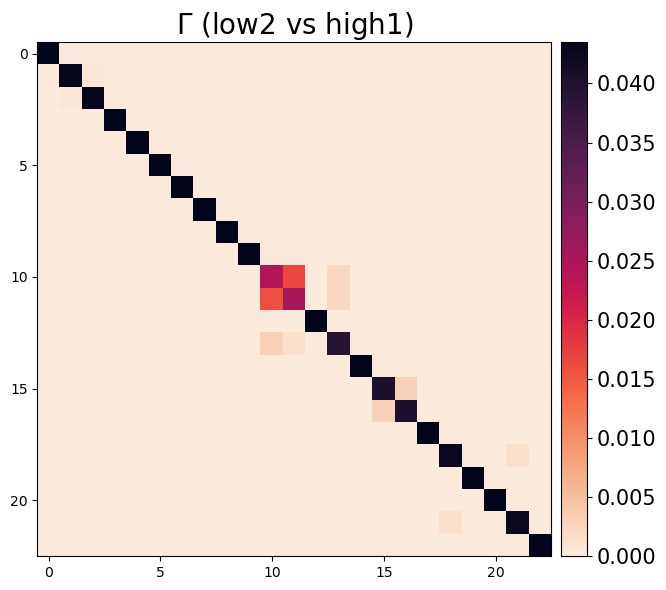

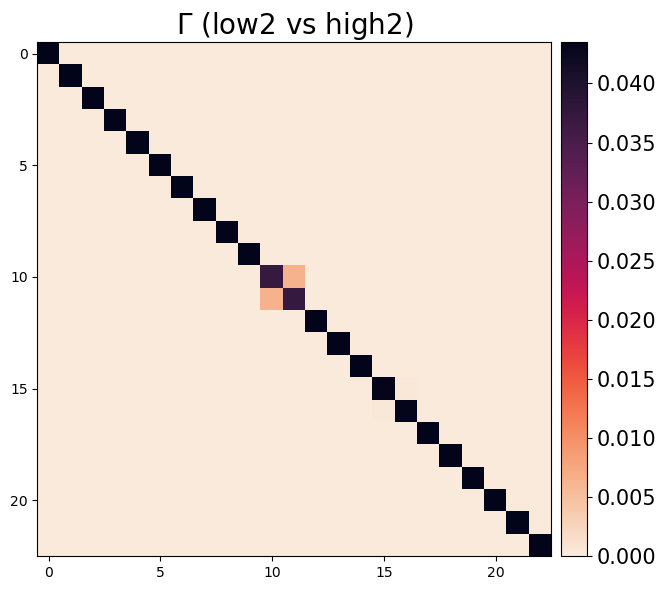

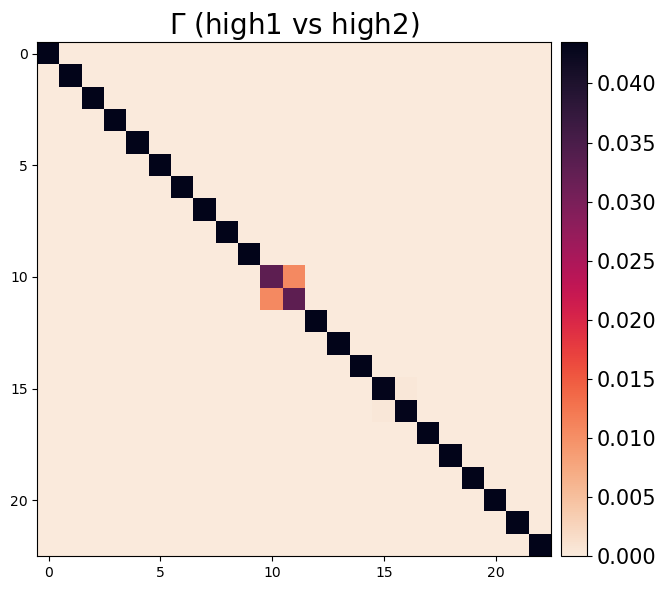

[array([[4.34782609e-02, 5.66733848e-12, 1.55350328e-15, 1.67914057e-17,
         9.64370082e-19, 2.99675469e-13, 2.56241052e-16, 2.58319280e-18,
         5.58379428e-19, 1.64061469e-18, 1.30059290e-46, 2.00726828e-43,
         4.08028297e-46, 8.46603715e-42, 6.50779875e-35, 1.78461910e-42,
         1.04159039e-39, 4.54875859e-43, 2.01136416e-47, 7.54547221e-43,
         2.95107375e-45, 3.13726690e-45, 1.82188841e-38],
        [3.28931461e-08, 4.34059457e-02, 7.22751227e-05, 7.50574655e-11,
         1.25171842e-14, 1.38207542e-10, 6.98953642e-09, 6.34936275e-15,
         9.51134963e-20, 9.78703692e-26, 7.17323224e-29, 2.17384317e-26,
         1.24532269e-32, 4.21877282e-28, 3.19011335e-46, 1.80912138e-59,
         5.22512687e-54, 4.09312468e-57, 3.67883003e-61, 3.23607836e-52,
         3.49346333e-46, 2.24898120e-59, 8.00208271e-59],
        [5.34204048e-13, 7.12310257e-05, 4.34056047e-02, 1.42369236e-06,
         3.34064760e-11, 1.77258767e-10, 1.22069479e-09, 1.82092407e-16,
        

In [41]:
visualization_config.set_params(
    xticks_rotation=0,
    cbar_label_size=15,
    cbar_ticks_size=15,
    xticks_size=20,
    yticks_size=20,
    xlabel_size=15,
    ylabel_size=15,
    
    cbar_format = "%.3f",
    )
    
sim_mat_format = "default"

align_representation.gw_alignment(
    compute_OT = compute_OT,
    delete_results = delete_results,
    return_data = True,
    return_figure = True,
    OT_format = sim_mat_format,
    visualization_config = visualization_config,
    sampler_seed = 42, 
    )

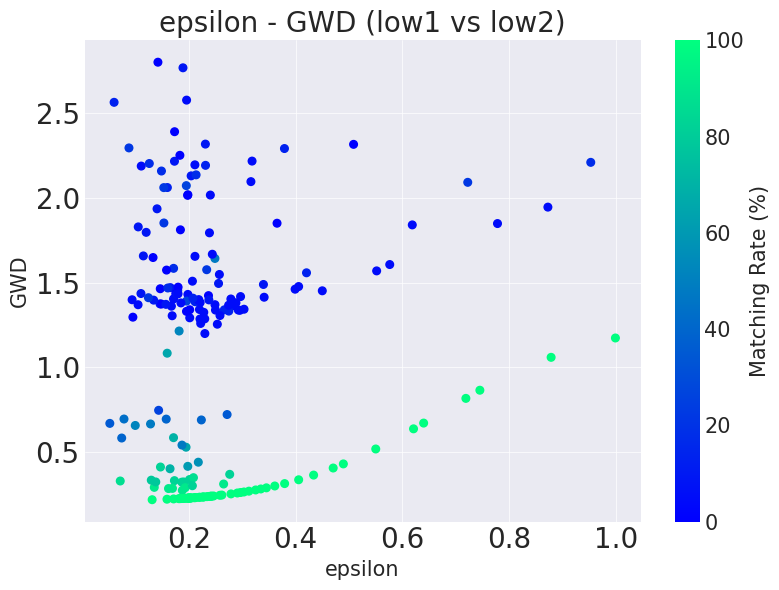

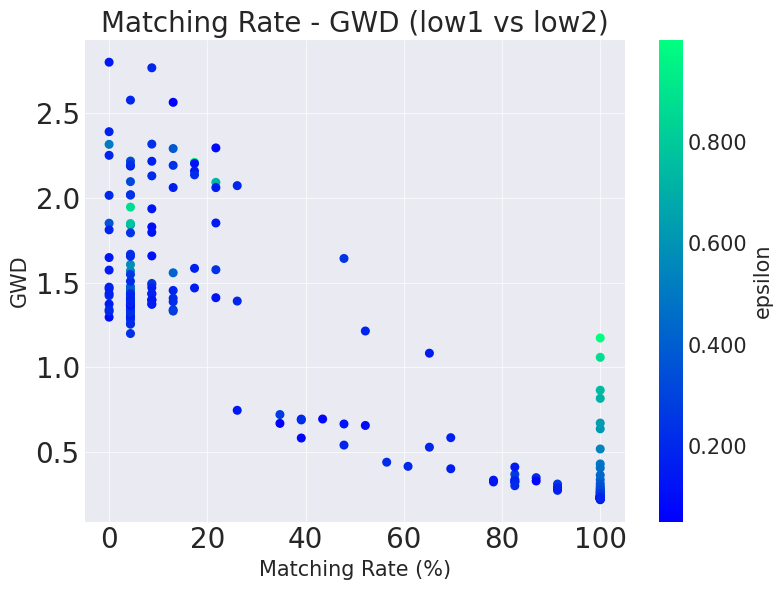

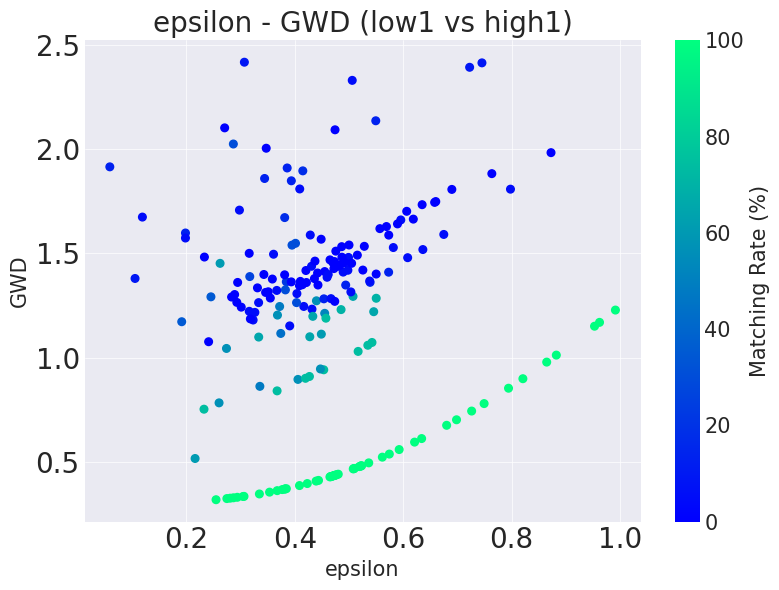

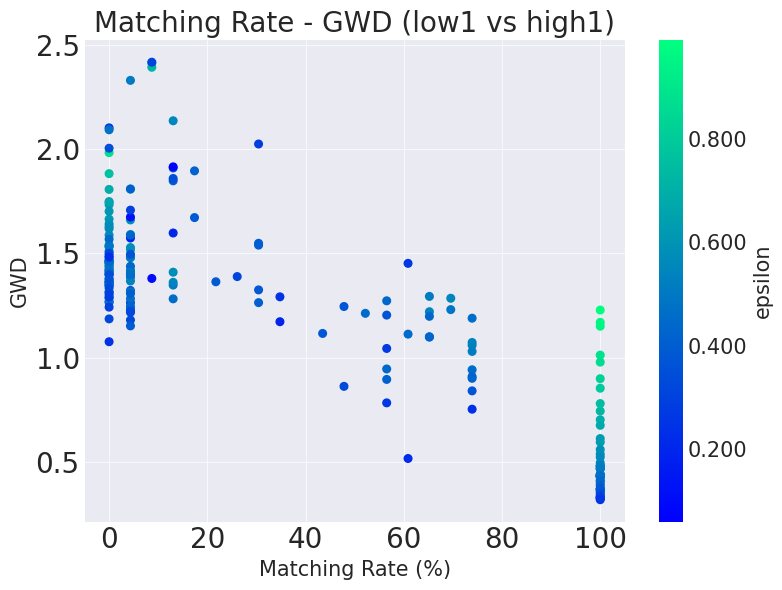

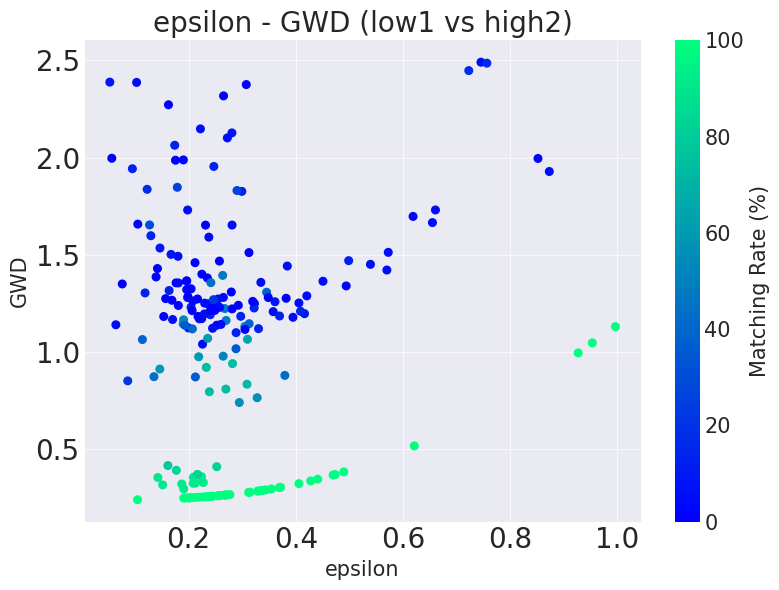

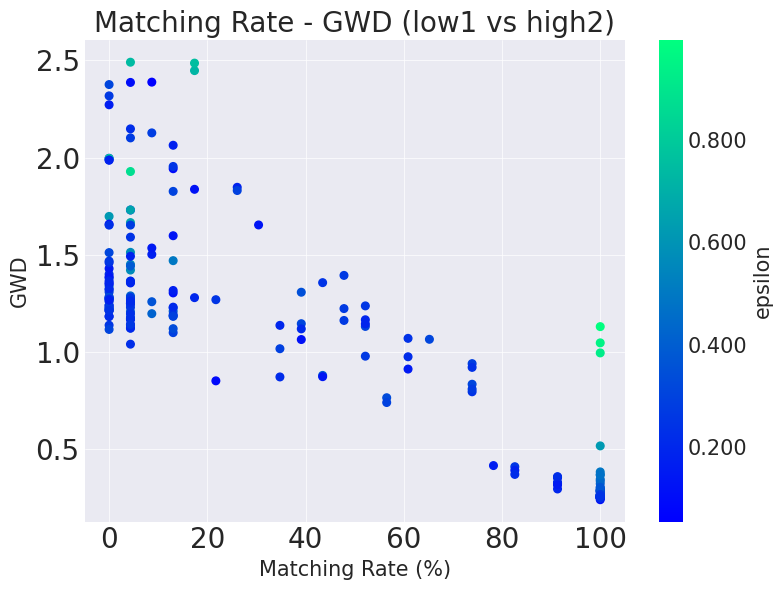

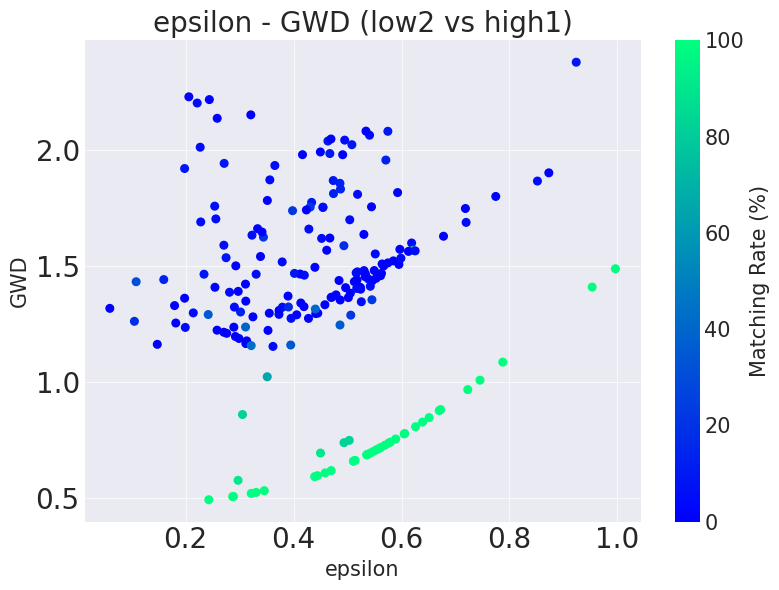

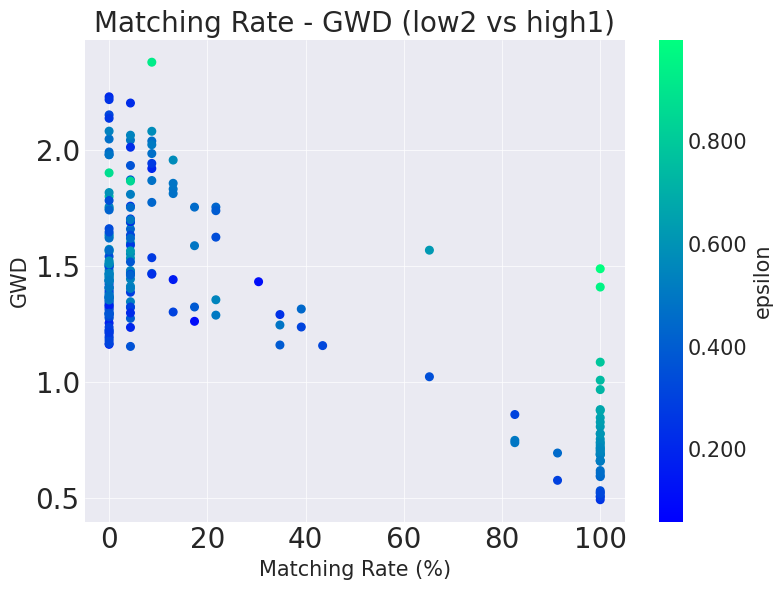

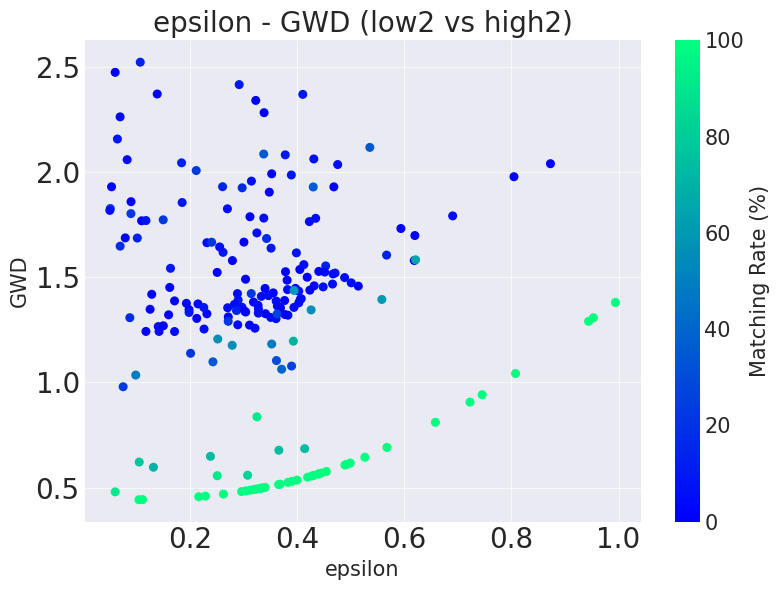

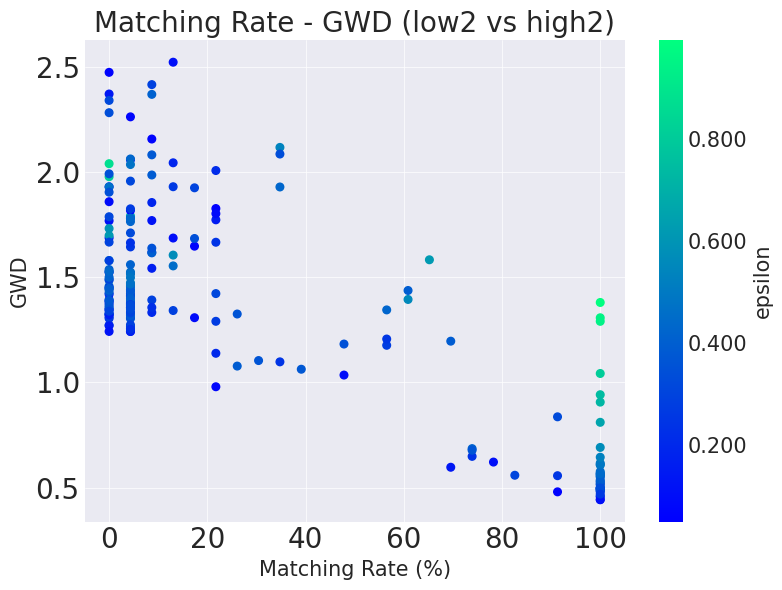

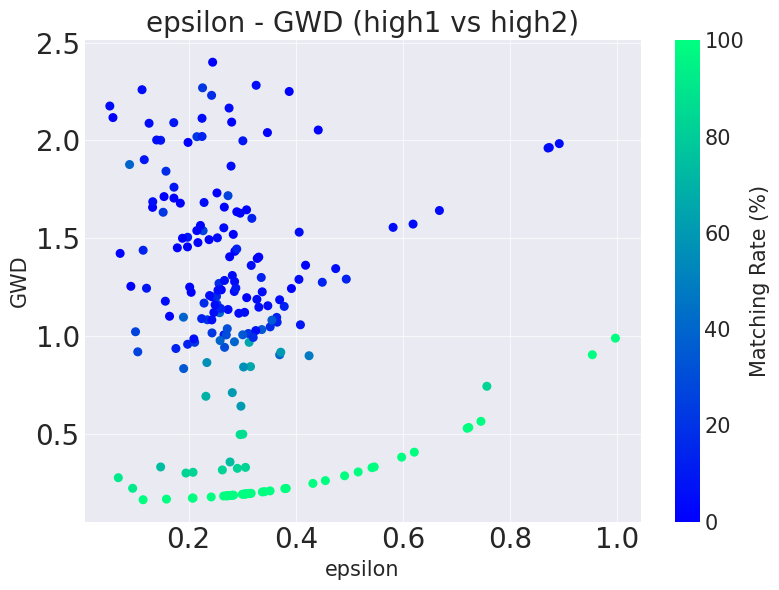

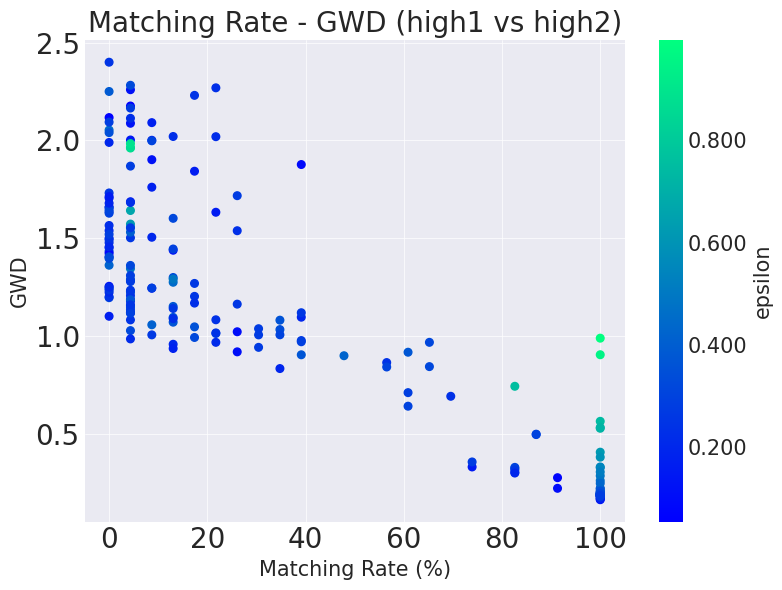

In [42]:
### Show how the GWD was optimized (evaluation figure)
# show both the relationships between epsilons and GWD, and between accuracy and GWD
visualization_config.set_params(cmap="winter")
align_representation.show_optimization_log(fig_dir=None, visualization_config=visualization_config) 

## Aligned embeddings

In [43]:
pair = align_representation.pairwise_list[0]

ot = pair.OT

source = pair.source.embedding
target = pair.target.embedding

new_source = pair.OT.T @ target * len(target)
new_target = pair.OT @ source * len(source)

In [54]:
pair

In [44]:
new_rep_list = [
    Representation(name="Group1", embedding=source),
    Representation(name="Group2", embedding=new_target),
]

ar = AlignRepresentations(
    config=config,
    representations_list=new_rep_list,
    histogram_matching=False,
    metric="cosine",
    main_results_dir="../results/" + data_select,
    data_name=data_select,
)

data_name : Amy
pairwise_method : combination
All the pairs in the list below will be computed. 
pair: Group1_vs_Group2 eps_list: [0.05, 1]


No category information is given.


/home/jovyan/work/GWTune/src/utils/visualize_functions.py:457: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


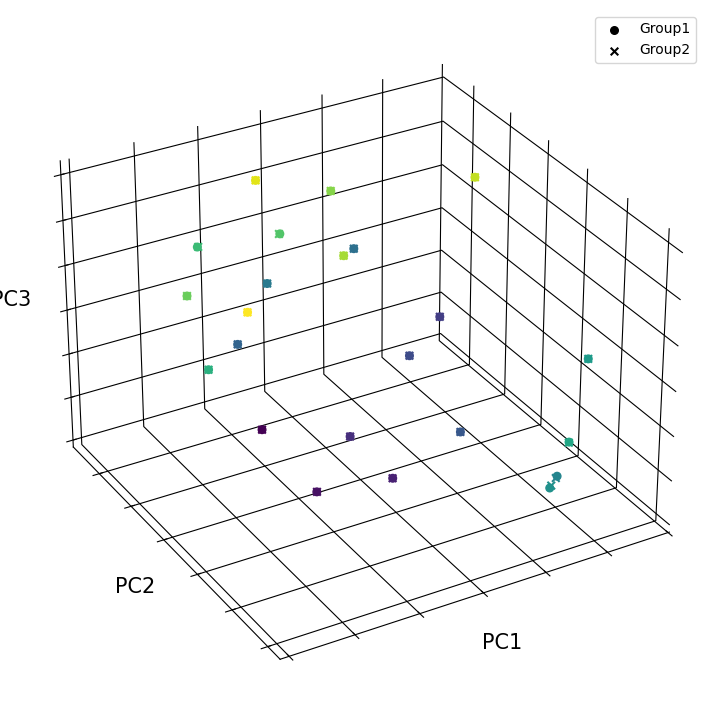

In [55]:
#file_path = "../data/Amy/Amy_dict.csv"
#data_color = pd.read_csv(file_path)
color_labels = unique_words # Set color labels if exist

visualization_embedding = VisualizationConfig(
    fig_ext="png",
    #color_labels='c', # If there is no specific color labels, please set it to "None". Color labels will be automatically generated in that case. 
    color_hue=None, # If "color_labels=None", you have the option to choose the color hue as either "cool", "warm", or "None".
    figsize=(9, 9), 
    xlabel="PC1", 
    ylabel="PC2",
    zlabel="PC3", 
    legend_size=10,
)

ar.visualize_embedding(
    dim=3, # the dimensionality of the space the points are embedded in. You can choose either 2 or 3.
    method="PCA",
    pivot=None,
    visualization_config=visualization_embedding
)

